In [69]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [71]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f42df33d7e018d605ccf2fbc49fe29e9


In [72]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=13000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=13000)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [73]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [74]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [75]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

2624

In [76]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [77]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moose factory
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | bassano
Processing Record 4 of Set 1 | marystown
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | lebedyn
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | cumberland
Processing Record 11 of Set 1 | songea
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | amudat
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | hithadhoo
Processing

Processing Record 34 of Set 4 | moiyabana
City not found. Skipping...
Processing Record 35 of Set 4 | butaritari
Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | avigliano
Processing Record 39 of Set 4 | suntar
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | chalmette
Processing Record 42 of Set 4 | erzin
Processing Record 43 of Set 4 | vaini
Processing Record 44 of Set 4 | colombia
Processing Record 45 of Set 4 | nouakchott
Processing Record 46 of Set 4 | labuhan
Processing Record 47 of Set 4 | san quintin
Processing Record 48 of Set 4 | key west
Processing Record 49 of Set 4 | ust-kuyga
Processing Record 50 of Set 4 | chongwe
Processing Record 1 of Set 5 | mahenge
Processing Record 2 of Set 5 | umea
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | oussouye
Processing Record 6 of Set 5 | totness
Process

Processing Record 24 of Set 8 | severobaykalsk
Processing Record 25 of Set 8 | evanston
Processing Record 26 of Set 8 | vila velha
Processing Record 27 of Set 8 | saint-francois
Processing Record 28 of Set 8 | tahta
Processing Record 29 of Set 8 | lompoc
Processing Record 30 of Set 8 | callaway
Processing Record 31 of Set 8 | novyy urengoy
Processing Record 32 of Set 8 | fukuma
Processing Record 33 of Set 8 | camenca
Processing Record 34 of Set 8 | singarayakonda
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | namie
Processing Record 37 of Set 8 | comodoro rivadavia
Processing Record 38 of Set 8 | puri
Processing Record 39 of Set 8 | killybegs
Processing Record 40 of Set 8 | zatoka
Processing Record 41 of Set 8 | camopi
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | presidente epitacio
Processing Record 44 of Set 8 | egvekinot
Processing Record 45 of Set 8 | kismayo
Processing Record 46 of Set 8 | nome
Processing Record 47 of Set 8 

Processing Record 15 of Set 12 | umtata
Processing Record 16 of Set 12 | gore
Processing Record 17 of Set 12 | sechura
Processing Record 18 of Set 12 | tibati
Processing Record 19 of Set 12 | hamilton
Processing Record 20 of Set 12 | praia
Processing Record 21 of Set 12 | hami
Processing Record 22 of Set 12 | rameshki
Processing Record 23 of Set 12 | chimbote
Processing Record 24 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | almaznyy
Processing Record 27 of Set 12 | umm durman
City not found. Skipping...
Processing Record 28 of Set 12 | abu kamal
Processing Record 29 of Set 12 | xingyi
Processing Record 30 of Set 12 | guapore
Processing Record 31 of Set 12 | chicama
Processing Record 32 of Set 12 | progreso
Processing Record 33 of Set 12 | madang
Processing Record 34 of Set 12 | sanchez
Processing Record 35 of Set 12 | zhezkazgan
Processing Record 36 of Set 12 | muisne
Processing Record 37 of Set 12 | jumla


Processing Record 50 of Set 15 | nakhon phanom
Processing Record 1 of Set 16 | cabrero
Processing Record 2 of Set 16 | loanda
Processing Record 3 of Set 16 | ornskoldsvik
Processing Record 4 of Set 16 | voh
Processing Record 5 of Set 16 | thunder bay
Processing Record 6 of Set 16 | luis correia
Processing Record 7 of Set 16 | soe
Processing Record 8 of Set 16 | kassala
Processing Record 9 of Set 16 | tera
Processing Record 10 of Set 16 | biltine
Processing Record 11 of Set 16 | san ramon de la nueva oran
Processing Record 12 of Set 16 | yar-sale
Processing Record 13 of Set 16 | lagos
Processing Record 14 of Set 16 | itoman
Processing Record 15 of Set 16 | sao gabriel da cachoeira
Processing Record 16 of Set 16 | amherst
Processing Record 17 of Set 16 | manzhouli
Processing Record 18 of Set 16 | kayerkan
Processing Record 19 of Set 16 | yumen
Processing Record 20 of Set 16 | katobu
Processing Record 21 of Set 16 | broken hill
Processing Record 22 of Set 16 | berlevag
Processing Record 2

Processing Record 37 of Set 19 | fukue
Processing Record 38 of Set 19 | santa cruz
Processing Record 39 of Set 19 | porto novo
Processing Record 40 of Set 19 | emmen
Processing Record 41 of Set 19 | baherden
Processing Record 42 of Set 19 | gejiu
Processing Record 43 of Set 19 | dzhebariki-khaya
Processing Record 44 of Set 19 | galiwinku
City not found. Skipping...
Processing Record 45 of Set 19 | pacific grove
Processing Record 46 of Set 19 | sassandra
Processing Record 47 of Set 19 | burica
City not found. Skipping...
Processing Record 48 of Set 19 | khonuu
City not found. Skipping...
Processing Record 49 of Set 19 | zverinogolovskoye
Processing Record 50 of Set 19 | yanan
City not found. Skipping...
Processing Record 1 of Set 20 | horodyshche
Processing Record 2 of Set 20 | aykhal
Processing Record 3 of Set 20 | balarampur
Processing Record 4 of Set 20 | olot
Processing Record 5 of Set 20 | oktyabrskoye
Processing Record 6 of Set 20 | dunedin
Processing Record 7 of Set 20 | koumac
P

Processing Record 27 of Set 23 | hokitika
Processing Record 28 of Set 23 | sultanpur
Processing Record 29 of Set 23 | jesup
Processing Record 30 of Set 23 | kirkuk
Processing Record 31 of Set 23 | morant bay
Processing Record 32 of Set 23 | esfarayen
Processing Record 33 of Set 23 | razdolinsk
Processing Record 34 of Set 23 | tamasane
Processing Record 35 of Set 23 | xiaoweizhai
Processing Record 36 of Set 23 | atambua
Processing Record 37 of Set 23 | pemba
Processing Record 38 of Set 23 | dengfeng
Processing Record 39 of Set 23 | marsa matruh
Processing Record 40 of Set 23 | lincoln
Processing Record 41 of Set 23 | coruripe
Processing Record 42 of Set 23 | weiser
Processing Record 43 of Set 23 | lannion
Processing Record 44 of Set 23 | cuauhtenco
Processing Record 45 of Set 23 | utete
Processing Record 46 of Set 23 | gladstone
Processing Record 47 of Set 23 | jatai
Processing Record 48 of Set 23 | boyolangu
Processing Record 49 of Set 23 | yialos
City not found. Skipping...
Processing

City not found. Skipping...
Processing Record 13 of Set 27 | porbandar
Processing Record 14 of Set 27 | sawakin
Processing Record 15 of Set 27 | xiangxiang
Processing Record 16 of Set 27 | salalah
Processing Record 17 of Set 27 | blagoyevo
Processing Record 18 of Set 27 | vlore
Processing Record 19 of Set 27 | igarka
Processing Record 20 of Set 27 | launceston
Processing Record 21 of Set 27 | kande
Processing Record 22 of Set 27 | fredericton
Processing Record 23 of Set 27 | kolpashevo
Processing Record 24 of Set 27 | campo verde
Processing Record 25 of Set 27 | gusoeni
Processing Record 26 of Set 27 | san luis
Processing Record 27 of Set 27 | mirzapur
Processing Record 28 of Set 27 | grants
Processing Record 29 of Set 27 | kyshtovka
Processing Record 30 of Set 27 | buin
Processing Record 31 of Set 27 | ondorhaan
City not found. Skipping...
Processing Record 32 of Set 27 | skjervoy
Processing Record 33 of Set 27 | kemijarvi
City not found. Skipping...
Processing Record 34 of Set 27 | b

Processing Record 2 of Set 31 | malwan
City not found. Skipping...
Processing Record 3 of Set 31 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 31 | quattro castella
Processing Record 5 of Set 31 | karakol
Processing Record 6 of Set 31 | newport
Processing Record 7 of Set 31 | sindor
Processing Record 8 of Set 31 | marzuq
Processing Record 9 of Set 31 | llanes
Processing Record 10 of Set 31 | auray
Processing Record 11 of Set 31 | beloha
Processing Record 12 of Set 31 | scottsburgh
City not found. Skipping...
Processing Record 13 of Set 31 | mettur
Processing Record 14 of Set 31 | shache
Processing Record 15 of Set 31 | lufilufi
Processing Record 16 of Set 31 | povazska bystrica
Processing Record 17 of Set 31 | amet
Processing Record 18 of Set 31 | lebowakgomo
Processing Record 19 of Set 31 | mazara del vallo
Processing Record 20 of Set 31 | mahabad
Processing Record 21 of Set 31 | muros
Processing Record 22 of Set 31 | pulandian
Processing Record 23 of Set 31 | honia

Processing Record 37 of Set 34 | imbituba
Processing Record 38 of Set 34 | turtkul
City not found. Skipping...
Processing Record 39 of Set 34 | donskoye
Processing Record 40 of Set 34 | tanga
Processing Record 41 of Set 34 | brigantine
Processing Record 42 of Set 34 | gweta
Processing Record 43 of Set 34 | murdochville
Processing Record 44 of Set 34 | maraa
Processing Record 45 of Set 34 | sebezh
Processing Record 46 of Set 34 | lamar
Processing Record 47 of Set 34 | omaruru
Processing Record 48 of Set 34 | zeliezovce
Processing Record 49 of Set 34 | korampallam
Processing Record 50 of Set 34 | toowoomba
Processing Record 1 of Set 35 | dawlatabad
Processing Record 2 of Set 35 | tateyama
Processing Record 3 of Set 35 | north bend
Processing Record 4 of Set 35 | shihezi
Processing Record 5 of Set 35 | traverse city
Processing Record 6 of Set 35 | kargasok
Processing Record 7 of Set 35 | americus
Processing Record 8 of Set 35 | butembo
Processing Record 9 of Set 35 | sergiyevsk
Processing

Processing Record 21 of Set 38 | ewa beach
Processing Record 22 of Set 38 | maarianhamina
Processing Record 23 of Set 38 | morgan city
Processing Record 24 of Set 38 | antipino
Processing Record 25 of Set 38 | tezu
Processing Record 26 of Set 38 | kabalo
Processing Record 27 of Set 38 | talcahuano
Processing Record 28 of Set 38 | ipixuna
Processing Record 29 of Set 38 | morrope
Processing Record 30 of Set 38 | derzhavinsk
Processing Record 31 of Set 38 | stornoway
Processing Record 32 of Set 38 | moba
Processing Record 33 of Set 38 | rockland
Processing Record 34 of Set 38 | dvinskoy
Processing Record 35 of Set 38 | cabedelo
Processing Record 36 of Set 38 | barcelona
Processing Record 37 of Set 38 | muscat
Processing Record 38 of Set 38 | klyuchi
Processing Record 39 of Set 38 | yongan
Processing Record 40 of Set 38 | nizhniy mamon
Processing Record 41 of Set 38 | aykino
Processing Record 42 of Set 38 | rasuceni
Processing Record 43 of Set 38 | talmenka
Processing Record 44 of Set 38 |

Processing Record 11 of Set 42 | bolobo
Processing Record 12 of Set 42 | bin qirdan
Processing Record 13 of Set 42 | aleksandro-nevskiy
Processing Record 14 of Set 42 | shushtar
Processing Record 15 of Set 42 | alexandroupoli
Processing Record 16 of Set 42 | saint simons
Processing Record 17 of Set 42 | dauriya
Processing Record 18 of Set 42 | katubao
Processing Record 19 of Set 42 | sept-iles
Processing Record 20 of Set 42 | weymouth
Processing Record 21 of Set 42 | netishyn
Processing Record 22 of Set 42 | nanzhang
Processing Record 23 of Set 42 | ojinaga
Processing Record 24 of Set 42 | iskateley
Processing Record 25 of Set 42 | sondershausen
Processing Record 26 of Set 42 | bokspits
City not found. Skipping...
Processing Record 27 of Set 42 | aanekoski
Processing Record 28 of Set 42 | laranjal paulista
Processing Record 29 of Set 42 | waitati
Processing Record 30 of Set 42 | ye
City not found. Skipping...
Processing Record 31 of Set 42 | lewiston
Processing Record 32 of Set 42 | ki

Processing Record 50 of Set 45 | bhatkal
Processing Record 1 of Set 46 | dalbandin
Processing Record 2 of Set 46 | dong hoi
Processing Record 3 of Set 46 | yuma
Processing Record 4 of Set 46 | yacuiba
Processing Record 5 of Set 46 | arrifes
Processing Record 6 of Set 46 | dabola
Processing Record 7 of Set 46 | karasjok
Processing Record 8 of Set 46 | sarasau
City not found. Skipping...
Processing Record 9 of Set 46 | osorno
Processing Record 10 of Set 46 | tarabuco
Processing Record 11 of Set 46 | kautokeino
Processing Record 12 of Set 46 | verdun
Processing Record 13 of Set 46 | craig
Processing Record 14 of Set 46 | punta de piedra
Processing Record 15 of Set 46 | lahad datu
Processing Record 16 of Set 46 | griffith
Processing Record 17 of Set 46 | port-de-paix
City not found. Skipping...
Processing Record 18 of Set 46 | fez
Processing Record 19 of Set 46 | thano bula khan
City not found. Skipping...
Processing Record 20 of Set 46 | carballo
Processing Record 21 of Set 46 | lehigh ac

Processing Record 36 of Set 49 | ondarroa
Processing Record 37 of Set 49 | bur gabo
City not found. Skipping...
Processing Record 38 of Set 49 | rockhampton
Processing Record 39 of Set 49 | lebanon
Processing Record 40 of Set 49 | mmabatho
Processing Record 41 of Set 49 | bydgoszcz
Processing Record 42 of Set 49 | troina
Processing Record 43 of Set 49 | oga
Processing Record 44 of Set 49 | la roche-sur-yon
Processing Record 45 of Set 49 | baoro
Processing Record 46 of Set 49 | kijang
Processing Record 47 of Set 49 | durango
Processing Record 48 of Set 49 | magaria
Processing Record 49 of Set 49 | tocopilla
Processing Record 50 of Set 49 | chimbarongo
Processing Record 1 of Set 50 | coihueco
Processing Record 2 of Set 50 | toppenish
Processing Record 3 of Set 50 | kawalu
Processing Record 4 of Set 50 | porto nacional
Processing Record 5 of Set 50 | arlo
Processing Record 6 of Set 50 | mwene-ditu
Processing Record 7 of Set 50 | bhag
Processing Record 8 of Set 50 | tres lagoas
Processing 

Processing Record 21 of Set 53 | khor
Processing Record 22 of Set 53 | balabac
Processing Record 23 of Set 53 | sedelnikovo
City not found. Skipping...
Processing Record 24 of Set 53 | ongandjera
-----------------------------
Data Retrieval Complete      
-----------------------------


In [78]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moose Factory,51.26,-80.61,35.60,47,1,21.92,CA,2020-02-21 19:02:48
1,Busselton,-33.65,115.33,75.99,22,100,10.85,AU,2020-02-21 19:00:23
2,Bassano,50.78,-112.47,25.39,74,79,9.42,CA,2020-02-21 19:02:49
3,Marystown,47.17,-55.15,18.55,70,100,18.57,CA,2020-02-21 19:02:49
4,Mataura,-46.19,168.86,50.00,92,67,3.00,NZ,2020-02-21 19:02:12
5,Lebedyn,50.59,34.48,33.30,79,80,4.07,UA,2020-02-21 19:02:49
6,Ahipara,-35.17,173.17,70.00,100,44,13.87,NZ,2020-02-21 19:02:49
7,Pevek,69.70,170.31,-8.91,98,100,12.41,RU,2020-02-21 19:02:50
8,Yulara,-25.24,130.99,78.80,26,0,11.41,AU,2020-02-21 18:59:48
9,Cumberland,35.05,-78.87,39.20,51,20,14.76,US,2020-02-21 19:02:50


In [79]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moose Factory,CA,2020-02-21 19:02:48,51.26,-80.61,35.60,47,1,21.92
1,Busselton,AU,2020-02-21 19:00:23,-33.65,115.33,75.99,22,100,10.85
2,Bassano,CA,2020-02-21 19:02:49,50.78,-112.47,25.39,74,79,9.42
3,Marystown,CA,2020-02-21 19:02:49,47.17,-55.15,18.55,70,100,18.57
4,Mataura,NZ,2020-02-21 19:02:12,-46.19,168.86,50.00,92,67,3.00
5,Lebedyn,UA,2020-02-21 19:02:49,50.59,34.48,33.30,79,80,4.07
6,Ahipara,NZ,2020-02-21 19:02:49,-35.17,173.17,70.00,100,44,13.87
7,Pevek,RU,2020-02-21 19:02:50,69.70,170.31,-8.91,98,100,12.41
8,Yulara,AU,2020-02-21 18:59:48,-25.24,130.99,78.80,26,0,11.41
9,Cumberland,US,2020-02-21 19:02:50,35.05,-78.87,39.20,51,20,14.76


In [80]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [81]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [82]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582312263.478816

In [83]:
#Convert to string format method (readable)
today = time.strftime("%x")
today

'02/21/20'

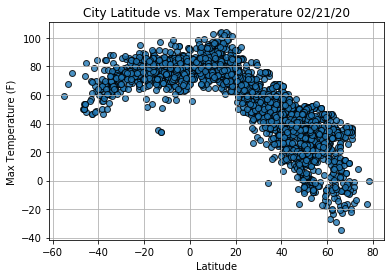

In [84]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

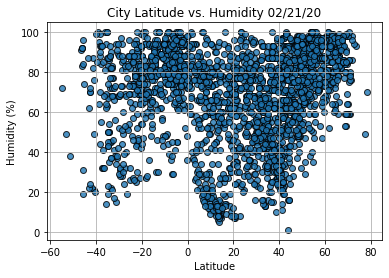

In [85]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

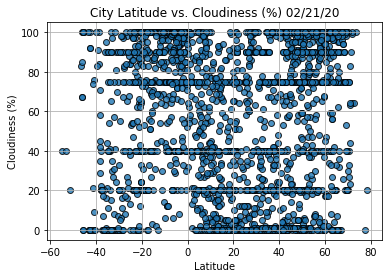

In [86]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

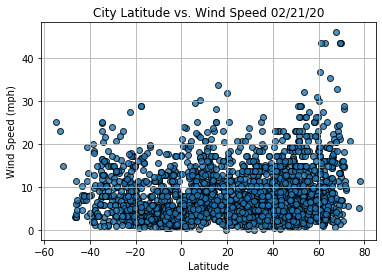

In [87]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [99]:
#Import linear regression
from scipy.stats import linregress

In [127]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [135]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.5115968958994211, intercept=83.26263694815592, rvalue=0.32008712412138296, pvalue=3.8439263478705415e-17, stderr=0.059120174458086705)

In [101]:
index13=city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2020-02-21 19:02:51
Lat                        -33.02
Lng                         27.91
Max Temp                     75.2
Humidity                       83
Cloudiness                     30
Wind Speed                  10.29
Name: 13, dtype: object

In [102]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moose Factory,CA,2020-02-21 19:02:48,51.26,-80.61,35.60,47,1,21.92
2,Bassano,CA,2020-02-21 19:02:49,50.78,-112.47,25.39,74,79,9.42
3,Marystown,CA,2020-02-21 19:02:49,47.17,-55.15,18.55,70,100,18.57
5,Lebedyn,UA,2020-02-21 19:02:49,50.59,34.48,33.30,79,80,4.07
7,Pevek,RU,2020-02-21 19:02:50,69.70,170.31,-8.91,98,100,12.41
...,...,...,...,...,...,...,...,...,...
2420,Banyo,CM,2020-02-21 19:11:01,6.75,11.82,85.93,19,98,8.19
2421,Khombole,SN,2020-02-21 19:11:02,14.77,-16.70,102.20,57,82,17.22
2423,Zmeinogorsk,RU,2020-02-21 19:11:02,51.16,82.19,22.23,81,100,3.40
2424,Khor,RU,2020-02-21 19:11:02,47.89,134.95,6.93,90,100,8.37


In [103]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moose Factory,CA,2020-02-21 19:02:48,51.26,-80.61,35.60,47,1,21.92
2,Bassano,CA,2020-02-21 19:02:49,50.78,-112.47,25.39,74,79,9.42
3,Marystown,CA,2020-02-21 19:02:49,47.17,-55.15,18.55,70,100,18.57
5,Lebedyn,UA,2020-02-21 19:02:49,50.59,34.48,33.30,79,80,4.07
7,Pevek,RU,2020-02-21 19:02:50,69.70,170.31,-8.91,98,100,12.41


In [104]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Busselton,AU,2020-02-21 19:00:23,-33.65,115.33,75.99,22,100,10.85
4,Mataura,NZ,2020-02-21 19:02:12,-46.19,168.86,50.00,92,67,3.00
6,Ahipara,NZ,2020-02-21 19:02:49,-35.17,173.17,70.00,100,44,13.87
8,Yulara,AU,2020-02-21 18:59:48,-25.24,130.99,78.80,26,0,11.41
10,Songea,TZ,2020-02-21 19:02:50,-10.68,35.65,73.40,88,75,6.93


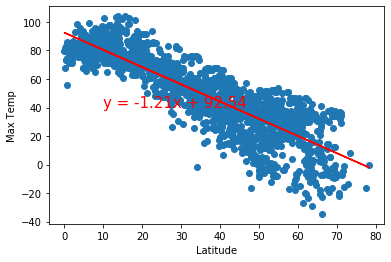

In [117]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

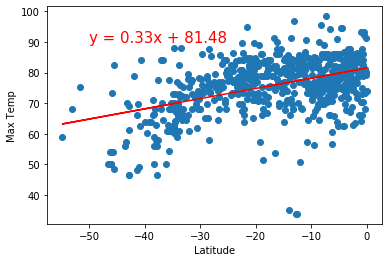

In [130]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere Maximum Temperature",
                       "Max Temp",(-50,90))

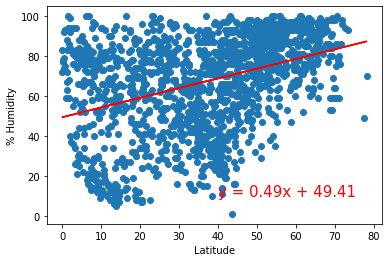

In [132]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

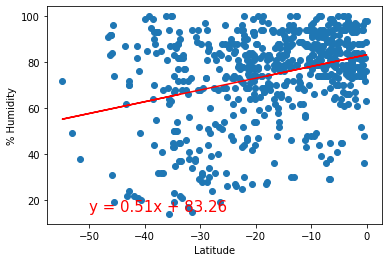

In [137]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [146]:
linregress(x_values, y_values)

LinregressResult(slope=-0.12397842917111428, intercept=4.974087602388428, rvalue=-0.2871379218527436, pvalue=5.902139242972241e-14, stderr=0.01614800800165498)

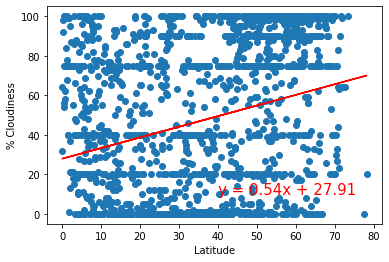

In [147]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

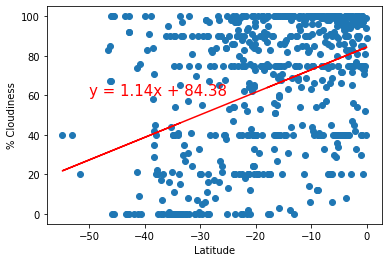

In [148]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

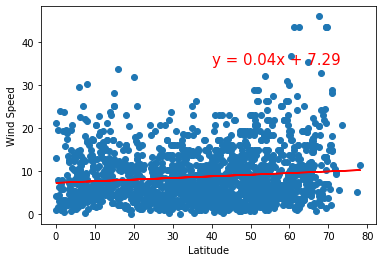

In [149]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

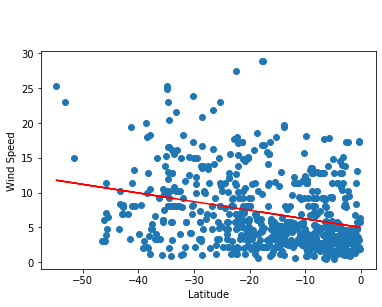

In [151]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))